Histograms and distributions
====

Often when we want to get a sense of some data we use summary statistics like mean, median, mode, max, min, and maybe standard deviation. A generalization of these quantities is to look at the entire distribution, and a graphical way to do that is with the [Histogram](https://en.wikipedia.org/wiki/Histogram).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Python's `statistics` module
https://docs.python.org/3/library/statistics.html

Python's standard library contains the `statistics` module , which has functions for common summary statistics on 1-d arrays (lists) of numerical data:

In [2]:
vec = [1] * 1 + [2] * 2 + [3] * 3 + [4] * 4 + [5] * 5
vec

[1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]

In [3]:
import statistics
statistics.mean(vec)

3.6666666666666665

In [4]:
statistics.median(vec)

4

In [5]:
statistics.stdev(vec)

1.2909944487358056

In [6]:
statistics.mode(vec)

5

As always, it is *strongly* recommended you read the documentation for these functions. Not only because it is important to understand the code we write, but because it can save us from trouble. 

For example, consider the following: 

In [7]:
vec2 = [1] * 1 + [2] * 2 + [3] * 3 + [4] * 5 + [5] * 5
vec2

[1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5]

Note that now, instead of every number N occuring N times, 4 and 5 both occur 5 times. 

Let's attempt to run the ```mode()``` function on ```vec2```: 

In [8]:
statistics.mode(vec2)

StatisticsError: ignored

It crashes. With a fairly descriptive error message, but still. These types of errors can be very dangerous, and this is far from the only one possible - it is critical that we understand these limitations and edge cases. 

# Discrete random variables: dice

Rolling a die of N sides can be thought of as randomly choosing a number between 1 and N (inclusive, oddly). We can simulate a die roll using Python's `random` module:

In [9]:
import random
random.randint(1, 6)

6

Execute the above block a few times. Each execution displays the outcome for that die roll.

# <font color='red'>EXERCISE 0.5</font>

Go find the documentation for randint()

After reading the documentation, replace the X's in the comment below with the correct numbers. 

***Don't*** *try to answer the question by running the code a bunch of times and recording the highest and lowest values. With random functions, we could run them many, many times and still not see the full range of return values. This exercise is designed to prompt you to read documentation*

In [10]:
# If you ran the following code: 
# randint(1, 101)
# The lowest possible return value would be: 1
# The higest possible return value would be: 101

# <font color='red'>EXERCISE 1</font>

Roll a six-sided die 100 times, recording the outcome for each roll in a list. Print the mean, median, and mode of the resulting outcome distribution. Try this a few times.

*Think back to the discussion about edge cases - be sure you read the documentation, and write your code to be robust.*

In [21]:
# Your code here!
dice_rolls = [];
x =0;
while x < 100:
  roll = random.randint(1,6);
  dice_rolls.append(roll);
  x=x+1;
#print(dice_rolls)

mean = statistics.mean(dice_rolls);
#mean not using stat.mean
#sum = 0;
#for i in dice_rolls: sum = i+sum; 
#mean2 = sum / len(dice_rolls)

median = statistics.median(dice_rolls);

try: 
  mode = statistics.mode(dice_rolls);
except: 
  mode_dict = {};
  for i in range(1,7):
    mode_dict[i]=0;
  for x in dice_rolls:
    mode_dict[x]=mode_dict[x]+1;
  mode = max(mode_dict, key=mode_dict.get);

print("MEAN: ", mean);
#print("MEAN2: ", mean2);
print("MEDIAN: ", median);
print("MODE: ", mode);



MEAN:  3.34
MEDIAN:  3.0
MODE:  1


# <font color='red'>EXERCISE 2</font>

In many dice games, the player rolls two dice and the outcome is taken to be the sum of the two dice values. Simulate 100 rolls of **two** six-sided dice; for each roll record the sum of the two dice.  Print the mean, median, and mode of the resulting outcome distribution. 

Try this a few times.

In [22]:
# Your code here!
# Your code here!
dice_rolls = [];
x =0;
while x < 100:
  roll1 = random.randint(1,6);
  roll2 = random.randint(1,6);
  dice_rolls.append(roll1+roll2);
  x=x+1;
#print(dice_rolls)

mean = statistics.mean(dice_rolls);

median = statistics.median(dice_rolls);

try: 
  mode = statistics.mode(dice_rolls);
except: 
  mode_dict = {};
  for i in range(1,7):
    mode_dict[i]=0;
  for x in dice_rolls:
    mode_dict[x]=mode_dict[x]+1;
  mode = max(mode_dict, key=mode_dict.get);

print("MEAN: ", mean);
print("MEDIAN: ", median);
print("MODE: ", mode);



MEAN:  7.06
MEDIAN:  7.0
MODE:  8


# <font color='red'>EXERCISE 3</font>
Write a function `roll_dice()` that takes two arguments in this order: the number of rolls and the number of sides. This function should return a dict with the keys being the possible outcomes for the die, and the values being the number of times that outcome came up, e.g. for 10 sides and 50 rolls, I might get
```
{
   1: 5,
   2: 7,
   ...
   10: 4,
}
```
**Ensure that all possible outcomes have a corresponding key even if there were no such events recorded.**

In [38]:
# Your code here!
def roll_dice(num_rolls, num_sides):
  roll_dict = {};
  for n in range(1,num_sides+1):
    roll_dict[n] = 0;
  for roll_count in range(1,num_rolls+1):
    roll = random.randint(1,num_sides);
    roll_dict[roll] = roll_dict[roll]+1;
  return roll_dict;

In [39]:
die_rolls = roll_dice(5, 9)
assert isinstance(die_rolls, dict)
assert len(die_rolls) == 9

die_rolls = roll_dice(20, 9)
assert len(die_rolls) == 9
assert sum(die_rolls.values()) == 20

# Drawing a histogram

We can set up a function that draws a very basic histogram using `matplotlib`:

In [36]:
from matplotlib import pyplot as plt
%matplotlib inline

def histogram(counts):
  fig, ax = plt.subplots()
  ax.bar(counts.keys(), counts.values())

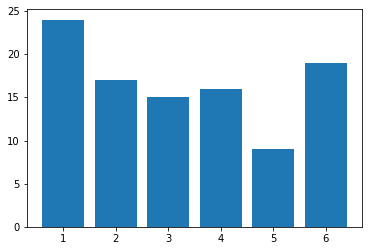

In [37]:
histogram(roll_dice(100, 6))

# <font color='red'>EXERCISE 4</font>

Write a function `roll_two_dice()` that takes two arguments in this order: the number of rolls and the number of sides. For each iteration, roll two dice with given number of sides and take their sum as the outcome.

This function should return a dict with the keys being the possible outcomes, and the values being the number of times that outcome occurred, e.g. for 10 sides and 100 rolls, I might get
```
{
   1: 5,
   2: 7,
   ...
   20: 4,
}
```
Ensure that all possible outcomes have a corresponding key even if there were zero such events recorded, and that there are no keys for impossible outcomes (e.g. 1 for two six-sided dice).

In [44]:
# Your code here!
def roll_two_dice(num_rolls, num_sides):
  roll_dict = {};
  n = 2;
  while n < (num_sides*2+1):
    roll_dict[n] = 0;
    n=n+1;
  for roll_count in range(1,num_rolls+1):
    roll1 = random.randint(1,num_sides);
    roll2 = random.randint(1,num_sides);
    final_roll = roll1 + roll2;
    roll_dict[final_roll] = roll_dict[final_roll]+1;
  return roll_dict;

In [45]:
die_rolls = roll_two_dice(5, 9)
assert isinstance(die_rolls, dict)
assert len(die_rolls) == 17

die_rolls = roll_two_dice(20, 9)
assert len(die_rolls) == 17
assert sum(die_rolls.values()) == 20

17


# <font color='red'>EXERCISE 5</font>

Use the above histogram() function to compare the distributions of `roll_dice` and `roll_two_dice` for 500 rolls of 6-sided dice. Try each a few times. What do you notice is consistently different about these two distributions? Draw each histogram and answer the question in text.

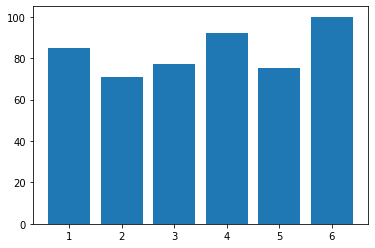

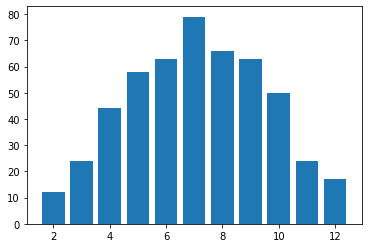

In [51]:
# Your code here!
histogram(roll_dice(500, 6))
histogram(roll_two_dice(500, 6))

In [ ]:
# What is consistently different about these two distributions?
# The single die roll was more evenly distributed while the two die roll was a bell curve distribution.

# Node degree distributions

Look up the documentation for the NetworkX command to create an Erdos-Renyi random graph:
```
G = nx.erdos_renyi_graph(N, p)
```

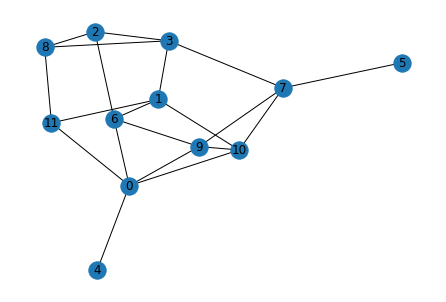

In [52]:
import networkx as nx
G = nx.erdos_renyi_graph(12, 0.2)
nx.draw(G, with_labels=True)

Also recall the `degree()` method which can give the degree for a specific node...

In [53]:
G.degree(5)

1

...or can return a dict containing the node degrees for every node in the graph:

In [54]:
G.degree()

DegreeView({0: 5, 1: 4, 2: 3, 3: 4, 4: 1, 5: 1, 6: 4, 7: 4, 8: 3, 9: 4, 10: 4, 11: 3})

If we want to examine the distribution of node degrees, we don't care about the node names, only the node degrees:

In [55]:
list(dict(G.degree()).values())

[5, 4, 3, 4, 1, 1, 4, 4, 3, 4, 4, 3]

We can treat each degree as if it were the outcome of a discrete random variable, like a die roll.

# <font color='red'>EXERCISE 6</font>

First, create an ER random graph with $N=100$ and $p=0.1$ and name it `G`. Then use the `histogram()` function to draw a histogram of the node degrees for the graph `G`. Don't worry about filling in "missing" values.

Also print the mean, median, and mode of the node degree distribution. Execute this a few times.

**Note:** while `histogram(dict(G.degree()))` will draw a plot, that plot is not a histogram. This is not the only example - your are responsible for checking whether or not the graph you produce accurately reflects the node degrees. An incorrect plot will result in zero credit for this exercise. 

10.14
10.0
10


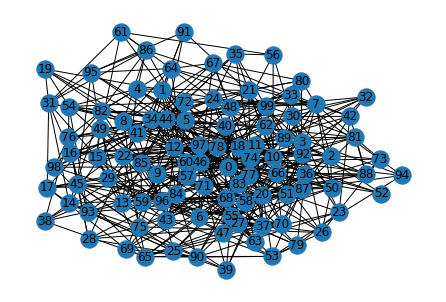

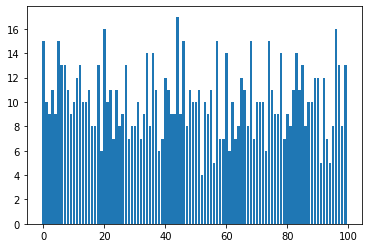

In [63]:
# Your code here!
import statistics
import networkx as nx
G = nx.erdos_renyi_graph(100, 0.1)
nx.draw(G, with_labels=True)

deg = []
deg_dic = {}
for n in G.nodes:
  deg_dic[n]=G.degree(n)
  deg.append(G.degree(n))
histogram(deg_dic)
print(statistics.mean(deg))
print(statistics.median(deg))
try: 
  mode = statistics.mode(deg);
except: 
  mode = max(deg_dic, key=deg_dic.get);
print(statistics.mode(deg))

# **Before submitting:**

1.   At the top, click the file name and prefix "*yourlastname_*" in front
2.   Download your completed file
3.   *Reupload your completed file and re-run it, to make sure everything is working as expected.*